# Monte Carlo evaluation of bounds for a specific DAG and any number of strata 

Here we use PyMC3 to do MCMC (Markov Chain Monte Carlo).

In [1]:
# this makes sure it starts looking for things from the JudeasRx folder down.
import os
import sys
os.chdir('../')
sys.path.insert(0,os.getcwd())
print(os.getcwd())

C:\Users\rrtuc\Desktop\backed-up\python-projects\JudeasRx


In [2]:
from ImaginedBayesNet import *
from MultiBounder_MC import *
import imp
from pprint import pprint
%matplotlib inline

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [3]:
# pots of in_bnet will be selected at random.
import random
random.seed(871)

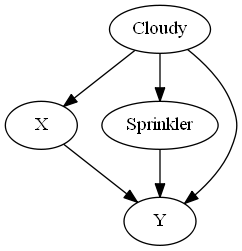

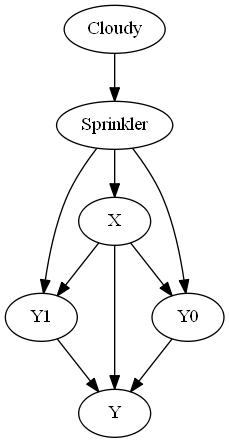

In [4]:
imagined_bnet = ImaginedBayesNet.build_test_imagined_bnet(
    draw=True, jupyter=True, use_Y0Y1=False, only_obs=False)

Above, the top figure is the input bnet, and the bottom figure is the imagined bnet. The imagined
bnet is built automatically by JudeasRx once you give it the input bnet. Note that the
input bnet has nodes X and Y and an arrow X->Y, but it doesn't have nodes Y0 and Y1. 
The imagined bnet has 2 new nodes Y0 and Y1 and different but related arrows.

Take a look at the code for the function `ImaginedBayesNet.build_test_imagined_bnet()` to see how
one sets up an input bnet, and how one asks JudeasRx to build the corresponding imagined bnet.

`ImaginedBayesNet.build_test_imagined_bnet()` specifies that there will be a single control node, namely 'Sprinkler', and that the 'Cloudy' node will be random (i.e., it will be assigned a different random value in each world).

In [5]:
bder = MultiBounder_MC(imagined_bnet,
                  num_1world_samples=1000,
                  num_worlds=100)
bder.set_PNS3_bds_and_stats()
bder.print_PNS3_bds_and_stats()

world:
0, 1, 2, 3, 4, 5, 6, 7, 8, 9
10, 11, 12, 13, 14, 15, 16, 17, 18, 19
20, 21, 22, 23, 24, 25, 26, 27, 28, 29
30, 31, 32, 33, 34, 35, 36, 37, 38, 39
40, 41, 42, 43, 44, 45, 46, 47, 48, 49
50, 51, 52, 53, 54, 55, 56, 57, 58, 59
60, 61, 62, 63, 64, 65, 66, 67, 68, 69
70, 71, 72, 73, 74, 75, 76, 77, 78, 79
80, 81, 82, 83, 84, 85, 86, 87, 88, 89
90, 91, 92, 93, 94, 95, 96, 97, 98, 99
control nodes: ['Sprinkler']
control coords to PNS3 bounds,
[[low PNS, high PNS],
 [low PN, high PN],
 [low PS, high PS]]:
{(0,): array([[0.222, 0.290],
       [0.427, 0.620],
       [0.392, 0.519]]),
 (1,): array([[0.223, 0.299],
       [0.432, 0.579],
       [0.421, 0.572]])}
control coords to PNS3 statistics,
[[mu PNS, sigma PNS],
 [mu PN, sigma PN],
 [mu PS, sigma PS]]:
{(0,): array([[0.253, 0.014],
       [0.517, 0.032],
       [0.458, 0.027]]),
 (1,): array([[0.252, 0.013],
       [0.502, 0.032],
       [0.504, 0.029]])}


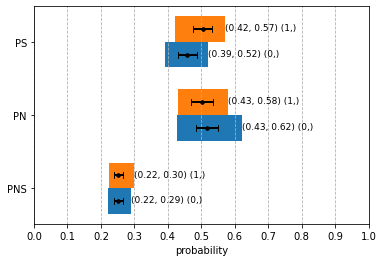

In [6]:
import matplotlib.pyplot as plt
from Plotter_nz import Plotter_nz

ax = plt.subplot()
Plotter_nz.plot_p3_bds(ax, 
    bder.get_PNS3_bds(),
    zname_to_p3_stats=bder.get_PNS3_stats(),
    horizontal=True)
plt.show()